In [1]:
import keras

2024-01-08 20:40:50.536500: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-08 20:40:50.616124: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-08 20:40:50.616161: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-08 20:40:50.618043: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-08 20:40:50.630279: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-08 20:40:50.630965: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [2]:
from keras.datasets import mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical
import numpy as np
from PIL import Image
import cv2
from scipy import ndimage

from functions import read_image_files, adjust_images, normalize_images, plot, invert, reshape_20x20

In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = adjust_images(train_images)
test_images = adjust_images(test_images)


In [4]:
train_images = normalize_images(train_images)
test_images = normalize_images(test_images)

In [5]:
hot_train_labels = to_categorical(train_labels)
hot_test_labels = to_categorical(test_labels)

3

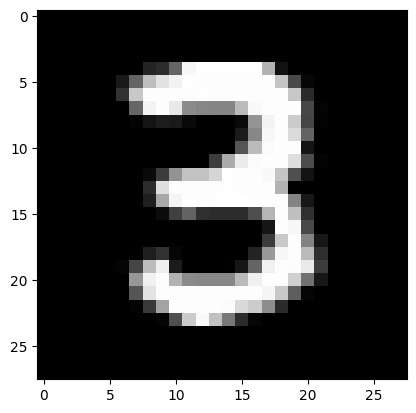

In [6]:
plt.imshow(train_images[7], cmap='grey')
train_labels[7]

In [7]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28, 1)))  # Flatten the input images
model.add(Dense(128, activation='relu'))  # Dense layer with 128 units and ReLU activation
model.add(Dense(10, activation='softmax'))  # Output layer with 10 units (for each digit) and softmax activation


In [8]:
model.compile(optimizer='adam',  # You can use other optimizers like 'sgd' or 'rmsprop'
              loss='categorical_crossentropy',  # For multi-class classification problems
              metrics=['accuracy'])


In [9]:
model.fit(train_images, hot_train_labels, epochs=10, batch_size=64, validation_split=0.1)


Epoch 1/10
844/844 [==============================] - 4s 4ms/step - loss: 0.2874 - accuracy: 0.9190 - val_loss: 0.1358 - val_accuracy: 0.9615
Epoch 2/10
844/844 [==============================] - 3s 3ms/step - loss: 0.1296 - accuracy: 0.9623 - val_loss: 0.1001 - val_accuracy: 0.9715
Epoch 3/10
844/844 [==============================] - 3s 3ms/step - loss: 0.0938 - accuracy: 0.9726 - val_loss: 0.0790 - val_accuracy: 0.9758
Epoch 4/10
844/844 [==============================] - 3s 3ms/step - loss: 0.0725 - accuracy: 0.9785 - val_loss: 0.0727 - val_accuracy: 0.9780
Epoch 5/10
844/844 [==============================] - 3s 3ms/step - loss: 0.0593 - accuracy: 0.9824 - val_loss: 0.0679 - val_accuracy: 0.9820
Epoch 6/10
844/844 [==============================] - 3s 3ms/step - loss: 0.0512 - accuracy: 0.9844 - val_loss: 0.0620 - val_accuracy: 0.9818
Epoch 7/10
844/844 [==============================] - 3s 3ms/step - loss: 0.0423 - accuracy: 0.9878 - val_loss: 0.0568 - val_accuracy: 0.9833
Epoch 

In [10]:
test_loss, test_accuracy = model.evaluate(test_images, hot_test_labels)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')


313/313 [==============================] - 1s 2ms/step - loss: 0.0583 - accuracy: 0.9824
Test Accuracy: 98.24%


1/1 [==============================] - 0s 132ms/step
[[4.5378203e-09 2.6557145e-03 2.0133883e-09 1.0008864e-06 8.5982931e-04
  4.1591889e-07 5.4876163e-11 1.7935487e-04 2.5909299e-06 9.9630105e-01]]
9


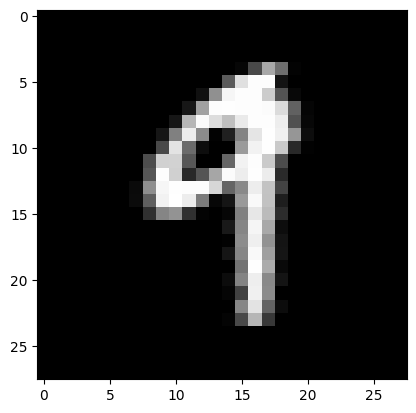

In [11]:
img = np.expand_dims(test_images[7], axis=0)
print(model.predict(img))
print(test_labels[7])
plot(test_images[7])

['0.png', '7.png', '9.png', '3.png', '6.png', '5.png', '8.png', '1.png', '2.png', '4.png']


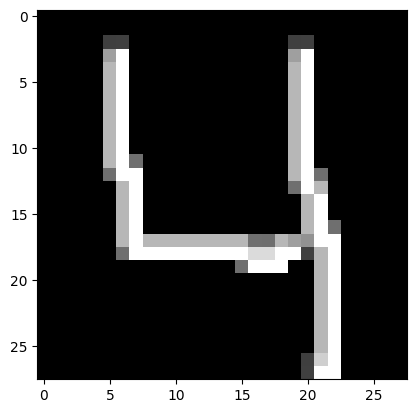

In [12]:
path = r'/home/frepa/Src/mnist/digits/frepa'
(names, images) = read_image_files(path)
print(names)
plot(images[9])

In [13]:
aimages = adjust_images(images)

In [14]:
iimages = normalize_images(aimages)

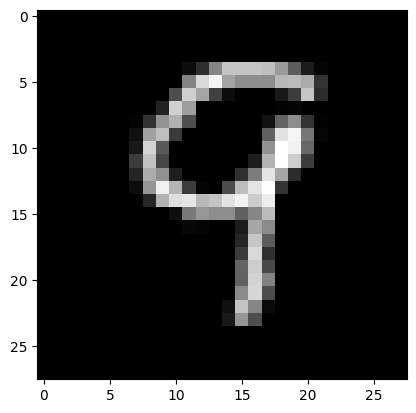

In [15]:
plot(iimages[2])

In [21]:

result = model.predict(iimages)
print(np.argmax(result, axis = 1))
print(names)


1/1 [==============================] - 0s 49ms/step
[0 7 9 3 6 5 8 1 2 4]
['0.png', '7.png', '9.png', '3.png', '6.png', '5.png', '8.png', '1.png', '2.png', '4.png']


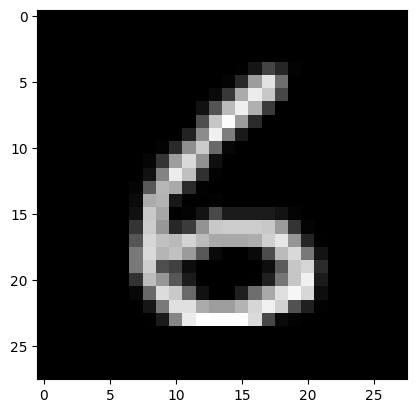

In [17]:
plot(images[4])